(50000, 28, 28) (50000,)


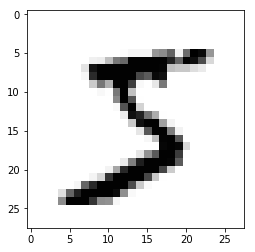

In [102]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [103]:
import numpy as np
import tensorflow as tf


In [104]:
X_train = np.reshape(X_train,(-1,784))
X_val = np.reshape(X_val,(-1,784))
X_test = np.reshape(X_test,(-1,784))

In [105]:
y_train=np.eye(10)[y_train]
y_val=np.eye(10)[y_val]
y_test=np.eye(10)[y_test]


In [106]:
X_test.shape

(10000, 784)

In [107]:
X = tf.placeholder('float32',shape=[None,784],name='input_X')
y = tf.placeholder('float32',[None,10],name='input_y')
batch_size = tf.placeholder(tf.int64)
hidden_size = 100

In [108]:
dataset = tf.data.Dataset.from_tensor_slices((X,y)).shuffle(buffer_size=10000).batch(batch_size).repeat()
iterator = dataset.make_initializable_iterator()
feature,label = iterator.get_next()

In [109]:
weights1 = tf.Variable(initial_value=tf.random_normal([784,hidden_size]))
biases1 = tf.Variable(initial_value = tf.random_normal([hidden_size]))

weights2 = tf.Variable(initial_value=tf.random_normal([hidden_size,10]))
biases2 = tf.Variable(initial_value = tf.random_normal([10]))


In [110]:
# The model code

# Compute a vector of predictions, resulting shape should be [input_X.shape[0],]
# This is 1D, if you have extra dimensions, you can  get rid of them with tf.squeeze .
# Don't forget the sigmoid.
layer1 = tf.nn.sigmoid(tf.matmul(feature,weights1)+biases1)
logits = tf.matmul(layer1,weights2)+biases2

prediction_y = tf.nn.softmax(logits)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = label))

# See above for an example. tf.train.*Optimizer
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)
correct_pred = tf.equal(tf.argmax(prediction_y, 1), tf.argmax(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [113]:
BATCH_SIZE=128
EPOCHS=10
n_batches = X_train.shape[0]//BATCH_SIZE

In [115]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    train_losses_list =[]
    valid_losses_list =[]
    for i in range(EPOCHS):
        sess.run(iterator.initializer, feed_dict={X:X_train,y:y_train,batch_size:BATCH_SIZE})
        total_loss = 0.
        train_acc = 0
        for _ in range(n_batches):
            _,losses,acc=sess.run([optimizer,loss,accuracy])
            total_loss += losses
            train_acc +=acc
        epoch_loss = total_loss/n_batches
        train_losses_list.append(epoch_loss)
        #print('Loss after apoch %d   %f accuracy = %f'%(i,epoch_loss,train_acc/n_batches))
    
        sess.run(iterator.initializer, feed_dict={X:X_val,y:y_val,batch_size:X_val.shape[0]})
        val_loss,val_acc=sess.run([loss,accuracy])
        valid_losses_list.append(val_loss)
        print('epoch %d Train Loss %f valid Loss %f train accuracy=%f valid accuracy = %f'%(i, epoch_loss, val_loss, train_acc/n_batches, val_acc))
    sess.run(iterator.initializer, feed_dict={X:X_test,y:y_test,batch_size:X_test.shape[0]})
    test_loss,test_acc=sess.run([loss,accuracy])
    print('Test Loss %f  Test Accuracy=%f'%(test_loss,test_acc))

epoch 0 Train Loss 0.630518 valid Loss 0.279135 train accuracy=0.840264 valid accuracy = 0.918700
epoch 1 Train Loss 0.230355 valid Loss 0.208281 train accuracy=0.931771 valid accuracy = 0.939600
epoch 2 Train Loss 0.159821 valid Loss 0.169364 train accuracy=0.951883 valid accuracy = 0.951300
epoch 3 Train Loss 0.120929 valid Loss 0.157120 train accuracy=0.963081 valid accuracy = 0.954300
epoch 4 Train Loss 0.095102 valid Loss 0.153006 train accuracy=0.970413 valid accuracy = 0.954900
epoch 5 Train Loss 0.078403 valid Loss 0.135888 train accuracy=0.975200 valid accuracy = 0.959800
epoch 6 Train Loss 0.064844 valid Loss 0.146606 train accuracy=0.980128 valid accuracy = 0.959800
epoch 7 Train Loss 0.055516 valid Loss 0.139880 train accuracy=0.982873 valid accuracy = 0.960400
epoch 8 Train Loss 0.049336 valid Loss 0.142899 train accuracy=0.984956 valid accuracy = 0.962100
epoch 9 Train Loss 0.042977 valid Loss 0.136504 train accuracy=0.986679 valid accuracy = 0.963600
Test Loss 0.145942  

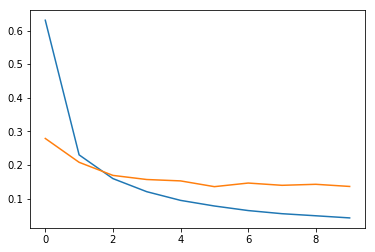

In [117]:
plt.plot(train_losses_list)
plt.plot(valid_losses_list)